[*********************100%***********************]  1 of 1 completed


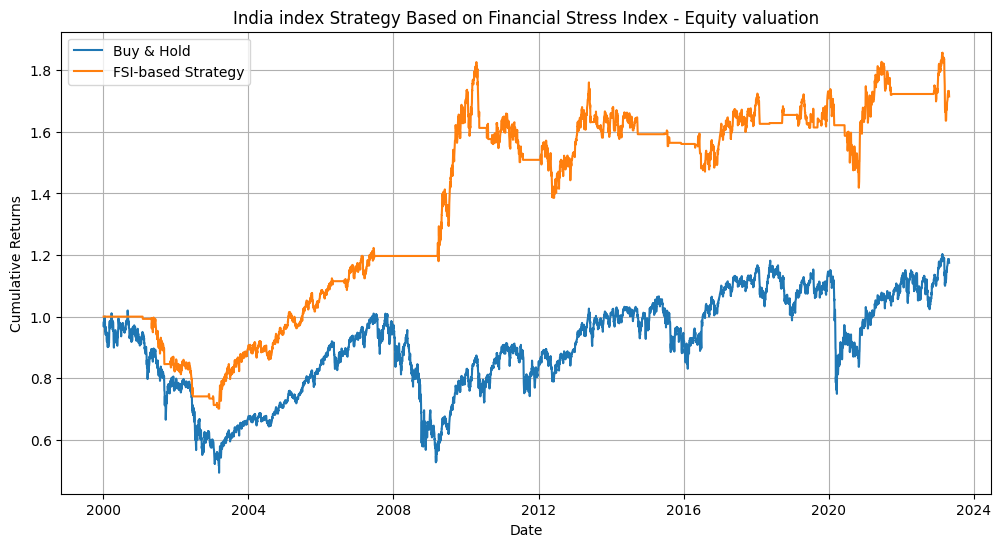

Annualized Returns:
0.006920
0.023351

Annualized Volatility:
0.186078
0.098352

Sharpe Ratios:
0.037190
0.237423

Maximum Drawdowns:
returns            -0.516483
strategy_returns   -0.298752
dtype: float64


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define India ETF ticker and start and end dates
india_etf = '^ftse'
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Download India ETF data from Yahoo Finance
prices = yf.download(india_etf, start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = prices.pct_change()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Align both datasets
aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

# Create a strategy DataFrame
strategy_data = aligned_data.copy()

# Calculate 14-day moving average of Equity valuation
strategy_data['equity_valuation_ma14'] = strategy_data['OFR FSI'].rolling(window=250).mean()

# Define the strategy
strategy_data['signal'] = np.where(strategy_data['OFR FSI'].shift(1) < strategy_data['equity_valuation_ma14'], 1, 0)
strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']


# Calculate cumulative returns

cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('India index Strategy Based on Financial Stress Index - Equity valuation')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Buy & Hold', 'FSI-based Strategy'])
plt.grid()
plt.show()

# Compute performance metrics
trading_days_per_year = 252
annualized_returns = cumulative_returns.iloc[-1] ** (trading_days_per_year / len(cumulative_returns)) - 1
annualized_volatility = strategy_data[['returns', 'strategy_returns']].std() * np.sqrt(trading_days_per_year)
sharpe_ratios = annualized_returns / annualized_volatility

# Calculate maximum drawdown
rolling_max = cumulative_returns.cummax()
drawdowns = (cumulative_returns - rolling_max) / rolling_max
max_drawdowns = drawdowns.min()

# Print performance metrics
print("Annualized Returns:")
print(annualized_returns.to_string(index=False))
print("\nAnnualized Volatility:")
print(annualized_volatility.to_string(index=False))
print("\nSharpe Ratios:")
print(sharpe_ratios.to_string(index=False))
print("\nMaximum Drawdowns:")
print(max_drawdowns)

[*********************100%***********************]  1 of 1 completed


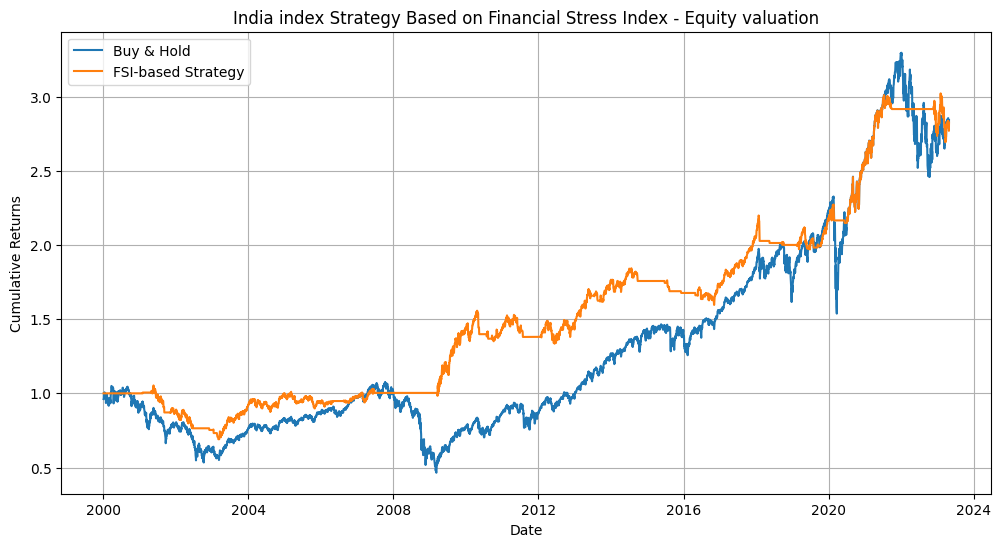

Annualized Returns:
0.045889
0.045602

Annualized Volatility:
0.198039
0.099136

Sharpe Ratios:
0.231719
0.459996

Maximum Drawdowns:
returns            -0.567754
strategy_returns   -0.344314
dtype: float64


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define India ETF ticker and start and end dates
india_etf = '^GSPC'
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Download India ETF data from Yahoo Finance
prices = yf.download(india_etf, start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = prices.pct_change()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Align both datasets
aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

# Create a strategy DataFrame
strategy_data = aligned_data.copy()

# Calculate 14-day moving average of Equity valuation
strategy_data['equity_valuation_ma14'] = strategy_data['OFR FSI'].rolling(window=250).mean()

# Define the strategy
strategy_data['signal'] = np.where(strategy_data['OFR FSI'].shift(1) < strategy_data['equity_valuation_ma14'], 1, 0)
strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']


# Calculate cumulative returns

cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('India index Strategy Based on Financial Stress Index - Equity valuation')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Buy & Hold', 'FSI-based Strategy'])
plt.grid()
plt.show()

# Compute performance metrics
trading_days_per_year = 252
annualized_returns = cumulative_returns.iloc[-1] ** (trading_days_per_year / len(cumulative_returns)) - 1
annualized_volatility = strategy_data[['returns', 'strategy_returns']].std() * np.sqrt(trading_days_per_year)
sharpe_ratios = annualized_returns / annualized_volatility

# Calculate maximum drawdown
rolling_max = cumulative_returns.cummax()
drawdowns = (cumulative_returns - rolling_max) / rolling_max
max_drawdowns = drawdowns.min()

# Print performance metrics
print("Annualized Returns:")
print(annualized_returns.to_string(index=False))
print("\nAnnualized Volatility:")
print(annualized_volatility.to_string(index=False))
print("\nSharpe Ratios:")
print(sharpe_ratios.to_string(index=False))
print("\nMaximum Drawdowns:")
print(max_drawdowns)

[*********************100%***********************]  1 of 1 completed


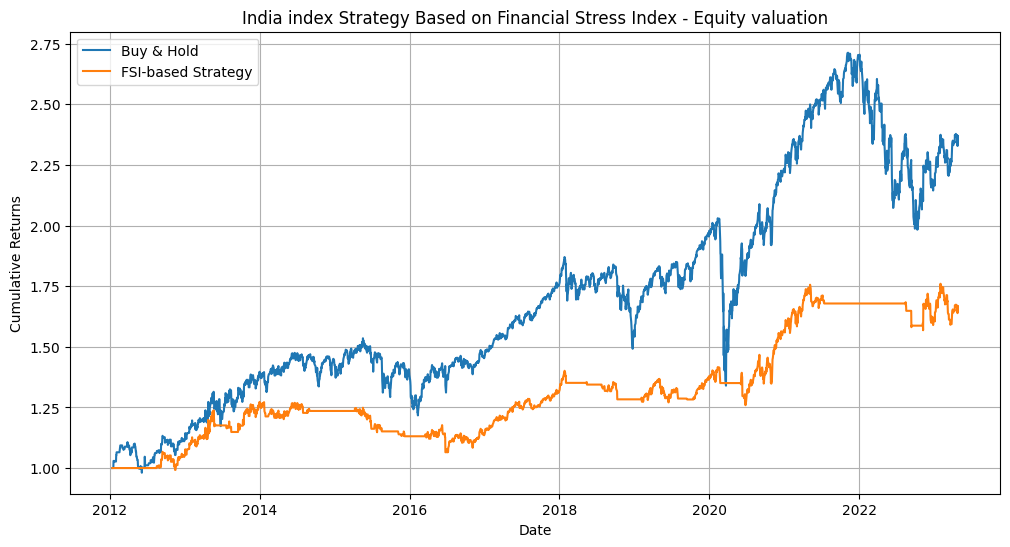

Annualized Returns:
0.079549
0.046432

Annualized Volatility:
0.177624
0.099365

Sharpe Ratios:
0.447850
0.467285

Maximum Drawdowns:
returns            -0.340090
strategy_returns   -0.163514
dtype: float64


In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define India ETF ticker and start and end dates
india_etf = 'URTH'
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Download India ETF data from Yahoo Finance
prices = yf.download(india_etf, start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = prices.pct_change()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Align both datasets
aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

# Create a strategy DataFrame
strategy_data = aligned_data.copy()

# Calculate 14-day moving average of Equity valuation
strategy_data['equity_valuation_ma14'] = strategy_data['OFR FSI'].rolling(window=150).mean()

# Define the strategy
strategy_data['signal'] = np.where(strategy_data['OFR FSI'].shift(1) < strategy_data['equity_valuation_ma14'], 1, 0)
strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']


# Calculate cumulative returns

cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('India index Strategy Based on Financial Stress Index - Equity valuation')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Buy & Hold', 'FSI-based Strategy'])
plt.grid()
plt.show()

# Compute performance metrics
trading_days_per_year = 252
annualized_returns = cumulative_returns.iloc[-1] ** (trading_days_per_year / len(cumulative_returns)) - 1
annualized_volatility = strategy_data[['returns', 'strategy_returns']].std() * np.sqrt(trading_days_per_year)
sharpe_ratios = annualized_returns / annualized_volatility

# Calculate maximum drawdown
rolling_max = cumulative_returns.cummax()
drawdowns = (cumulative_returns - rolling_max) / rolling_max
max_drawdowns = drawdowns.min()

# Print performance metrics
print("Annualized Returns:")
print(annualized_returns.to_string(index=False))
print("\nAnnualized Volatility:")
print(annualized_volatility.to_string(index=False))
print("\nSharpe Ratios:")
print(sharpe_ratios.to_string(index=False))
print("\nMaximum Drawdowns:")
print(max_drawdowns)

[*********************100%***********************]  1 of 1 completed


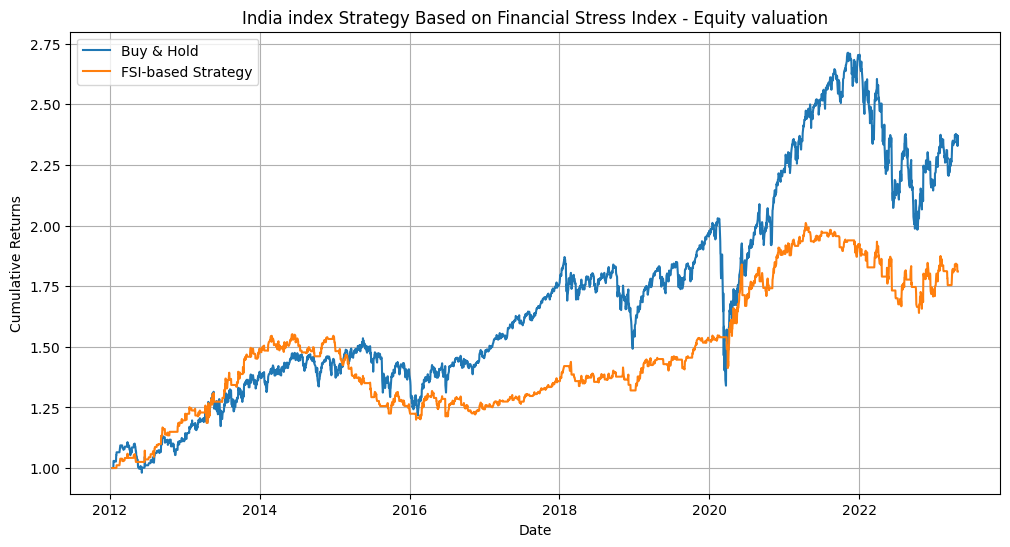

Annualized Returns:
0.079549
0.054071

Annualized Volatility:
0.177624
0.111134

Sharpe Ratios:
0.447850
0.486542

Maximum Drawdowns:
returns            -0.34009
strategy_returns   -0.22721
dtype: float64


In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define India ETF ticker and start and end dates
india_etf = 'URTH'
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Download India ETF data from Yahoo Finance
prices = yf.download(india_etf, start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = prices.pct_change()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Align both datasets
aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

# Create a strategy DataFrame
strategy_data = aligned_data.copy()

# Calculate 14-day moving average of Equity valuation
strategy_data['equity_valuation_ma14'] = strategy_data['OFR FSI'].rolling(window=14).mean()

# Define the strategy
strategy_data['signal'] = np.where(strategy_data['OFR FSI'].shift(1) < strategy_data['equity_valuation_ma14'], 1, 0)
strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']


# Calculate cumulative returns

cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('India index Strategy Based on Financial Stress Index - Equity valuation')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Buy & Hold', 'FSI-based Strategy'])
plt.grid()
plt.show()

# Compute performance metrics
trading_days_per_year = 252
annualized_returns = cumulative_returns.iloc[-1] ** (trading_days_per_year / len(cumulative_returns)) - 1
annualized_volatility = strategy_data[['returns', 'strategy_returns']].std() * np.sqrt(trading_days_per_year)
sharpe_ratios = annualized_returns / annualized_volatility

# Calculate maximum drawdown
rolling_max = cumulative_returns.cummax()
drawdowns = (cumulative_returns - rolling_max) / rolling_max
max_drawdowns = drawdowns.min()

# Print performance metrics
print("Annualized Returns:")
print(annualized_returns.to_string(index=False))
print("\nAnnualized Volatility:")
print(annualized_volatility.to_string(index=False))
print("\nSharpe Ratios:")
print(sharpe_ratios.to_string(index=False))
print("\nMaximum Drawdowns:")
print(max_drawdowns)